# Analysing and plotting genetic allele frequency data using pandas, seaborn and matplotlib

In [2]:
# Import modules and packages

import os
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from upsetplot import plot

In [89]:
# Set constants and functions

home_path = str(os.path.dirname(os.getcwd()))
population_clusters = ["SUPER","SUB"]

gene_location_df = pd.read_csv(os.path.join(home_path, "Data_descriptions", "locations.csv"))
genes = gene_location_df.location_name

sample_info_df = pd.read_csv(os.path.join(home_path, "Data_descriptions", "samples.csv"))
sub_populations = sample_info_df.SUB.unique()

## Set figure area and font size
sns.set(rc={"figure.figsize": (15, 12)})
SMALL_font = 8
MEDIUM_font = 10
BIGGER_font = 16



## Create barplot of variant count per gene

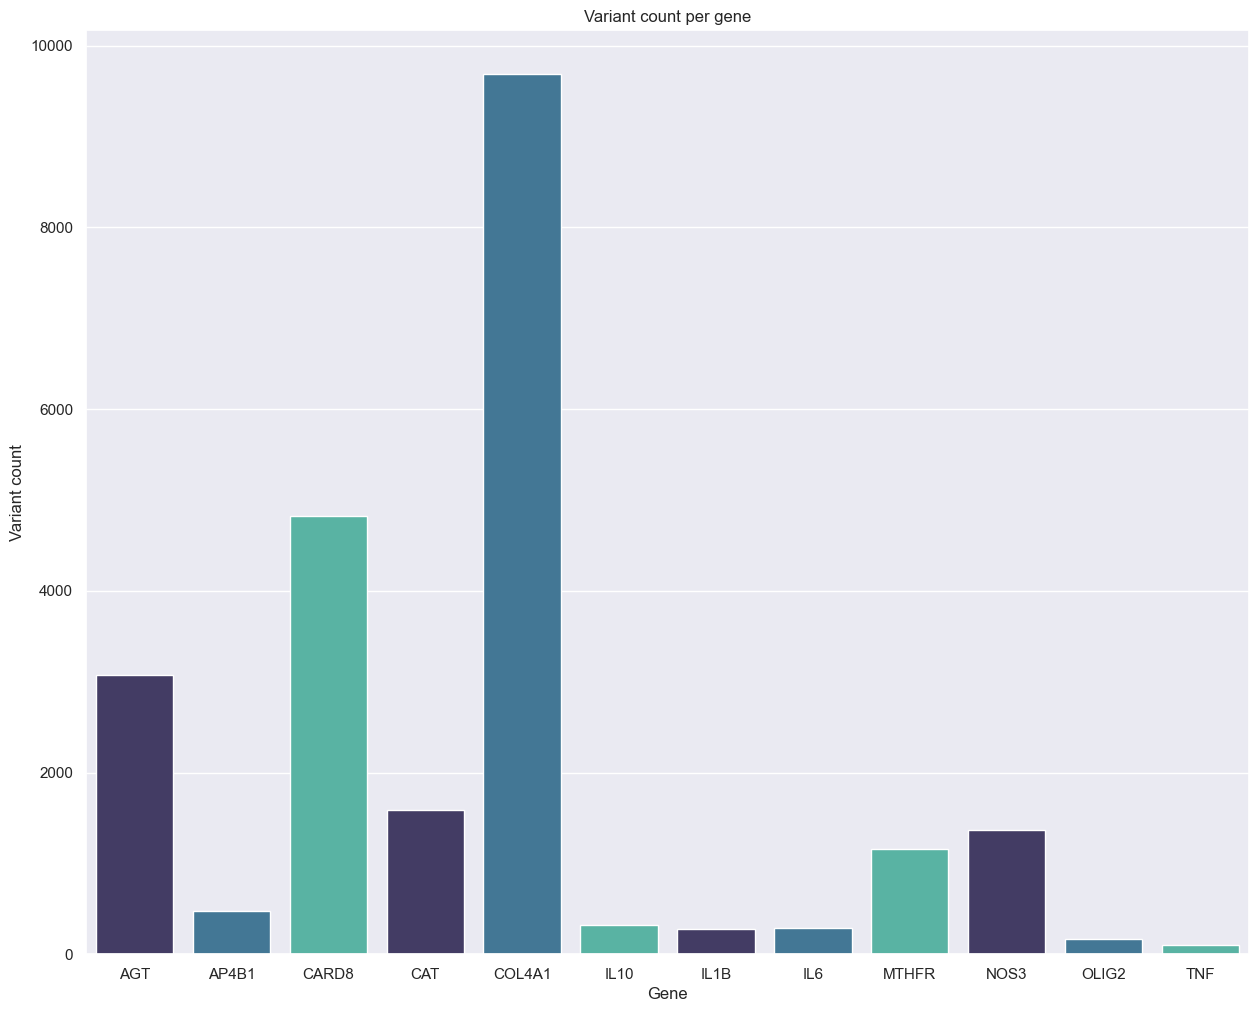

In [90]:
# Generate barplot of variant count per gene

# Import allele count data as pandas dataframe, calculate reference allele counts (reference allele count = total observed count - alternate allele count) and format dataframe correctly
collated_count_data = pd.DataFrame()
for gene in genes:
    allele_count_path = os.path.join(home_path,"Data", "SUPER", "ALL_{}.AFR.acount".format(gene))
    if os.path.exists(allele_count_path):
        allele_count_df = pd.read_csv(allele_count_path, sep="\t")
        allele_count_df["REF_CTS"] = allele_count_df["OBS_CT"] - allele_count_df["ALT_CTS"]
        allele_count_df["GENE"] = gene
    collated_count_data = pd.concat([collated_count_data, allele_count_df])

collated_count_data

# Count unique variants for each gene and sub-population
collated_count_grouped = pd.DataFrame(collated_count_data.groupby(["GENE"]).count()["ID"].reset_index().rename(columns={"ID":"COUNT"}))

# Create barplot
custom_palette = sns.color_palette("mako", 3)
variant_barplot = sns.barplot(
    x="GENE",
    y="COUNT",
    data=collated_count_grouped,
    palette=custom_palette,
)

variant_barplot.set_ylabel("Variant count")
variant_barplot.set_xlabel("Gene")

plt.title(label="Variant count per gene")
plt.rc('font', size=SMALL_font)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_font)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_font)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_font)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_font)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_font)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_font)  # fontsize of the figure title
plt.show()